# Outlier analysis

+ An outlier is an observation that is unlike the other observations.
+ It is rare, or distinct, or does not fit in some way.
+ Root cause: Measurement or input error, Data corruption, True outlier observation 

There is no precise way to define and identify outliers in general.
Instead, you, or a domain expert, must interpret the raw observations and decide whether a value is an outlier or not.

We can use statistical methods to identify observations that appear to be rare or unlikely given the available data.

In [1]:
#load packages
import sys
import pandas as pd
import matplotlib 
import numpy as np 
import scipy as sp 
import sklearn 

#misc libraries
import random
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
##Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8
%config InlineBackend.figure_format='retina'

In [3]:
data_raw = pd.read_csv('data/MELBOURNE_HOUSE_PRICES_LESS.csv')
data1 = data_raw.copy(deep = True)
data1.fillna(data1.median(), inplace=True)
data1.info()
data1.head() 
# #data_raw.tail()
# data_raw.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52964 entries, 0 to 52963
Data columns (total 12 columns):
Suburb           52964 non-null object
Address          52964 non-null object
Rooms            52964 non-null int64
Type             52964 non-null object
Price            52964 non-null float64
Method           52964 non-null object
SellerG          52964 non-null object
Date             52964 non-null object
Regionname       52964 non-null object
Propertycount    52964 non-null int64
Distance         52964 non-null float64
CouncilArea      52964 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 4.8+ MB


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,Western Metropolitan,3464,10.4,Moonee Valley City Council


## Univariate Parametric methods

We make an assumption about the distribution of the data. 
If we know that the distribution of values in the sample is Gaussian or Gaussian-like, 
we can use the standard deviation of the sample as a cut-off for identifying outliers.


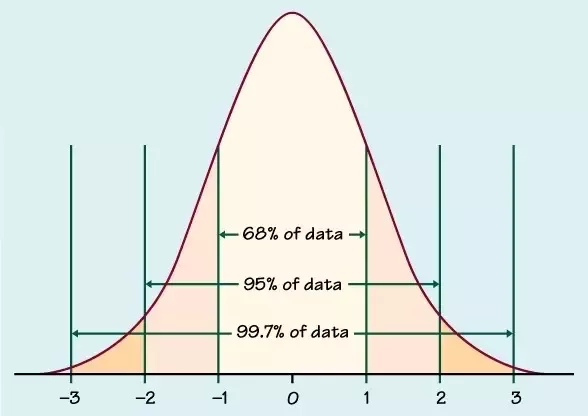

Not all data is normal or normal enough to treat it as being drawn from a Gaussian distribution.

A good statistic for summarizing a non-Gaussian distribution sample of data is the Interquartile Range (IQR).
The IQR is calculated as the difference between the 75th and the 25th percentiles of the data and defines the box in a box and whisker plot.

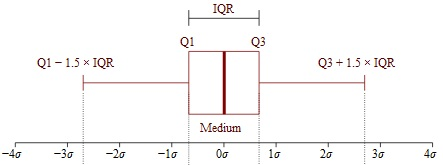

In [4]:
def out_std(s, nstd=3.0, return_thresholds=False):
    data_mean = s.mean()
    data_std = s.std()
    cut_off = data_std * nstd
    lower = data_mean - cut_off
    upper = data_mean + cut_off
    if return_thresholds:
        return lower, upper
    else:
        return [True if x < lower or x > upper else False for x in s]

def out_iqr(s, k=1.5, return_thresholds=False):
    # calculate interquartile range
    q25 = np.percentile(s, 25)
    q75 = np.percentile(s, 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * k
    lower = q25 - cut_off
    upper = q75 + cut_off
    if return_thresholds:
        return lower, upper
    else: # identify outliers
        return [True if x < lower or x > upper else False for x in s]


In [5]:
mask = out_std(data1['Price'])
data1[mask].head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Regionname,Propertycount,Distance,CouncilArea
33,Balwyn,9 Kenilworth St,5,h,2700000.0,PI,hockingstuart,1/04/2017,Southern Metropolitan,5682,7.9,Boroondara City Council
39,Balwyn North,203 Belmore Rd,4,h,2600000.0,VB,Jellis,1/04/2017,Southern Metropolitan,7809,9.7,Boroondara City Council
63,Black Rock,38 Ardoyne St,4,h,3000000.0,S,Buxton,1/04/2017,Southern Metropolitan,2866,17.3,Bayside City Council
90,Brighton East,3 Sunlight Cr,4,h,2975000.0,S,Marshall,1/04/2017,Southern Metropolitan,6938,10.3,Bayside City Council
131,Canterbury,16 Parlington St,5,h,3300000.0,VB,Jellis,1/04/2017,Southern Metropolitan,3265,8.4,Boroondara City Council


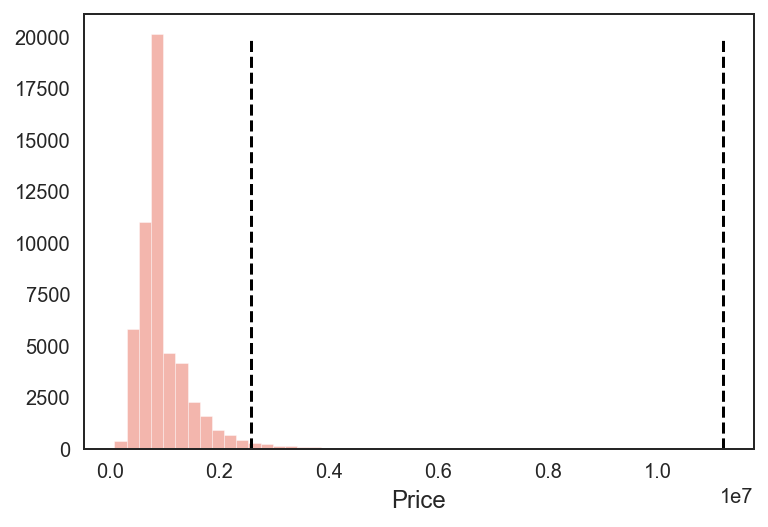

In [6]:
sns.distplot(data1['Price'], kde=False)
out_min = data1['Price'][mask].min()
out_max = data1['Price'][mask].max()
plt.vlines(out_min, ymin=0, ymax=20000, linestyles='dashed')
plt.vlines(out_max, ymin=0, ymax=20000, linestyles='dashed')

In [7]:
mask = out_iqr(data1['Price'])
data1[mask].head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Regionname,Propertycount,Distance,CouncilArea
9,Albert Park,18 Mills St,3,h,1925000.0,S,Cayzer,1/04/2017,Southern Metropolitan,3280,3.0,Port Phillip City Council
13,Alphington,41 Toolangi Rd,4,h,2008000.0,S,Jellis,1/04/2017,Northern Metropolitan,2211,5.7,Darebin City Council
18,Armadale,6A Auburn Gr,2,h,2110000.0,S,Jellis,1/04/2017,Southern Metropolitan,4836,6.3,Stonnington City Council
33,Balwyn,9 Kenilworth St,5,h,2700000.0,PI,hockingstuart,1/04/2017,Southern Metropolitan,5682,7.9,Boroondara City Council
34,Balwyn,4 Lynch Ct,3,h,2035000.0,PI,Marshall,1/04/2017,Southern Metropolitan,5682,7.9,Boroondara City Council


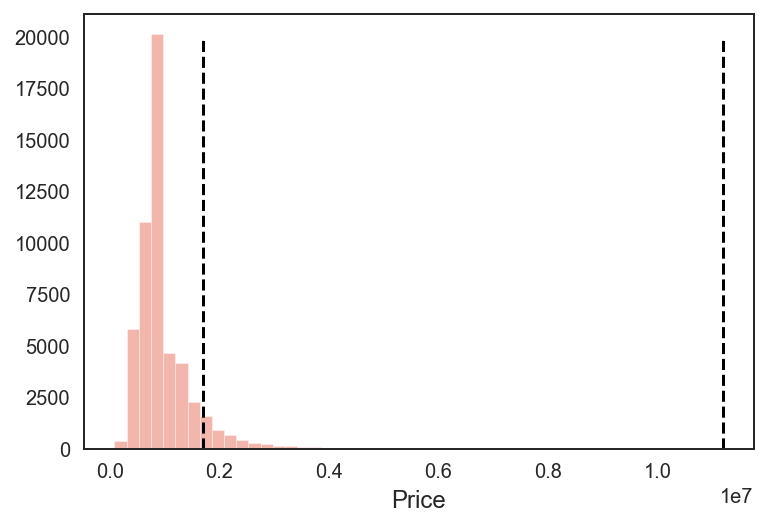

In [8]:
sns.distplot(data1['Price'], kde=False)
out_min = data1['Price'][mask].min()
out_max = data1['Price'][mask].max()
plt.vlines(out_min, ymin=0, ymax=20000, linestyles='dashed')
plt.vlines(out_max, ymin=0, ymax=20000, linestyles='dashed')

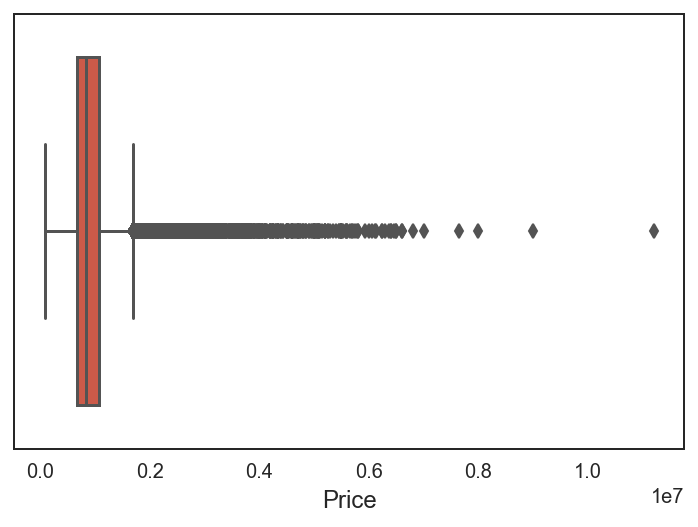

In [9]:
sns.boxplot(data1['Price'])

## Multivariate Parametric methods

We can generalize the gaussian idea to n-dimensional space, called EllipticEnvelope is sklearn.

In [10]:
from sklearn.covariance import EllipticEnvelope
import scipy.stats as stats

contamination=0.05
clf = EllipticEnvelope(contamination=contamination)

X1 = data1['Price']
X2 = data1['Distance']

xx, yy = np.meshgrid(np.linspace(np.min(X1)-5, np.max(X1)+5, 500), np.linspace(np.min(X2)-5, np.max(X2)+5, 500))

clf.fit(data1[['Price','Distance']])
threshold = stats.scoreatpercentile(clf.decision_function(data1[['Price','Distance']]), 100*0.05)
threshold




-2.03071066906535e-15

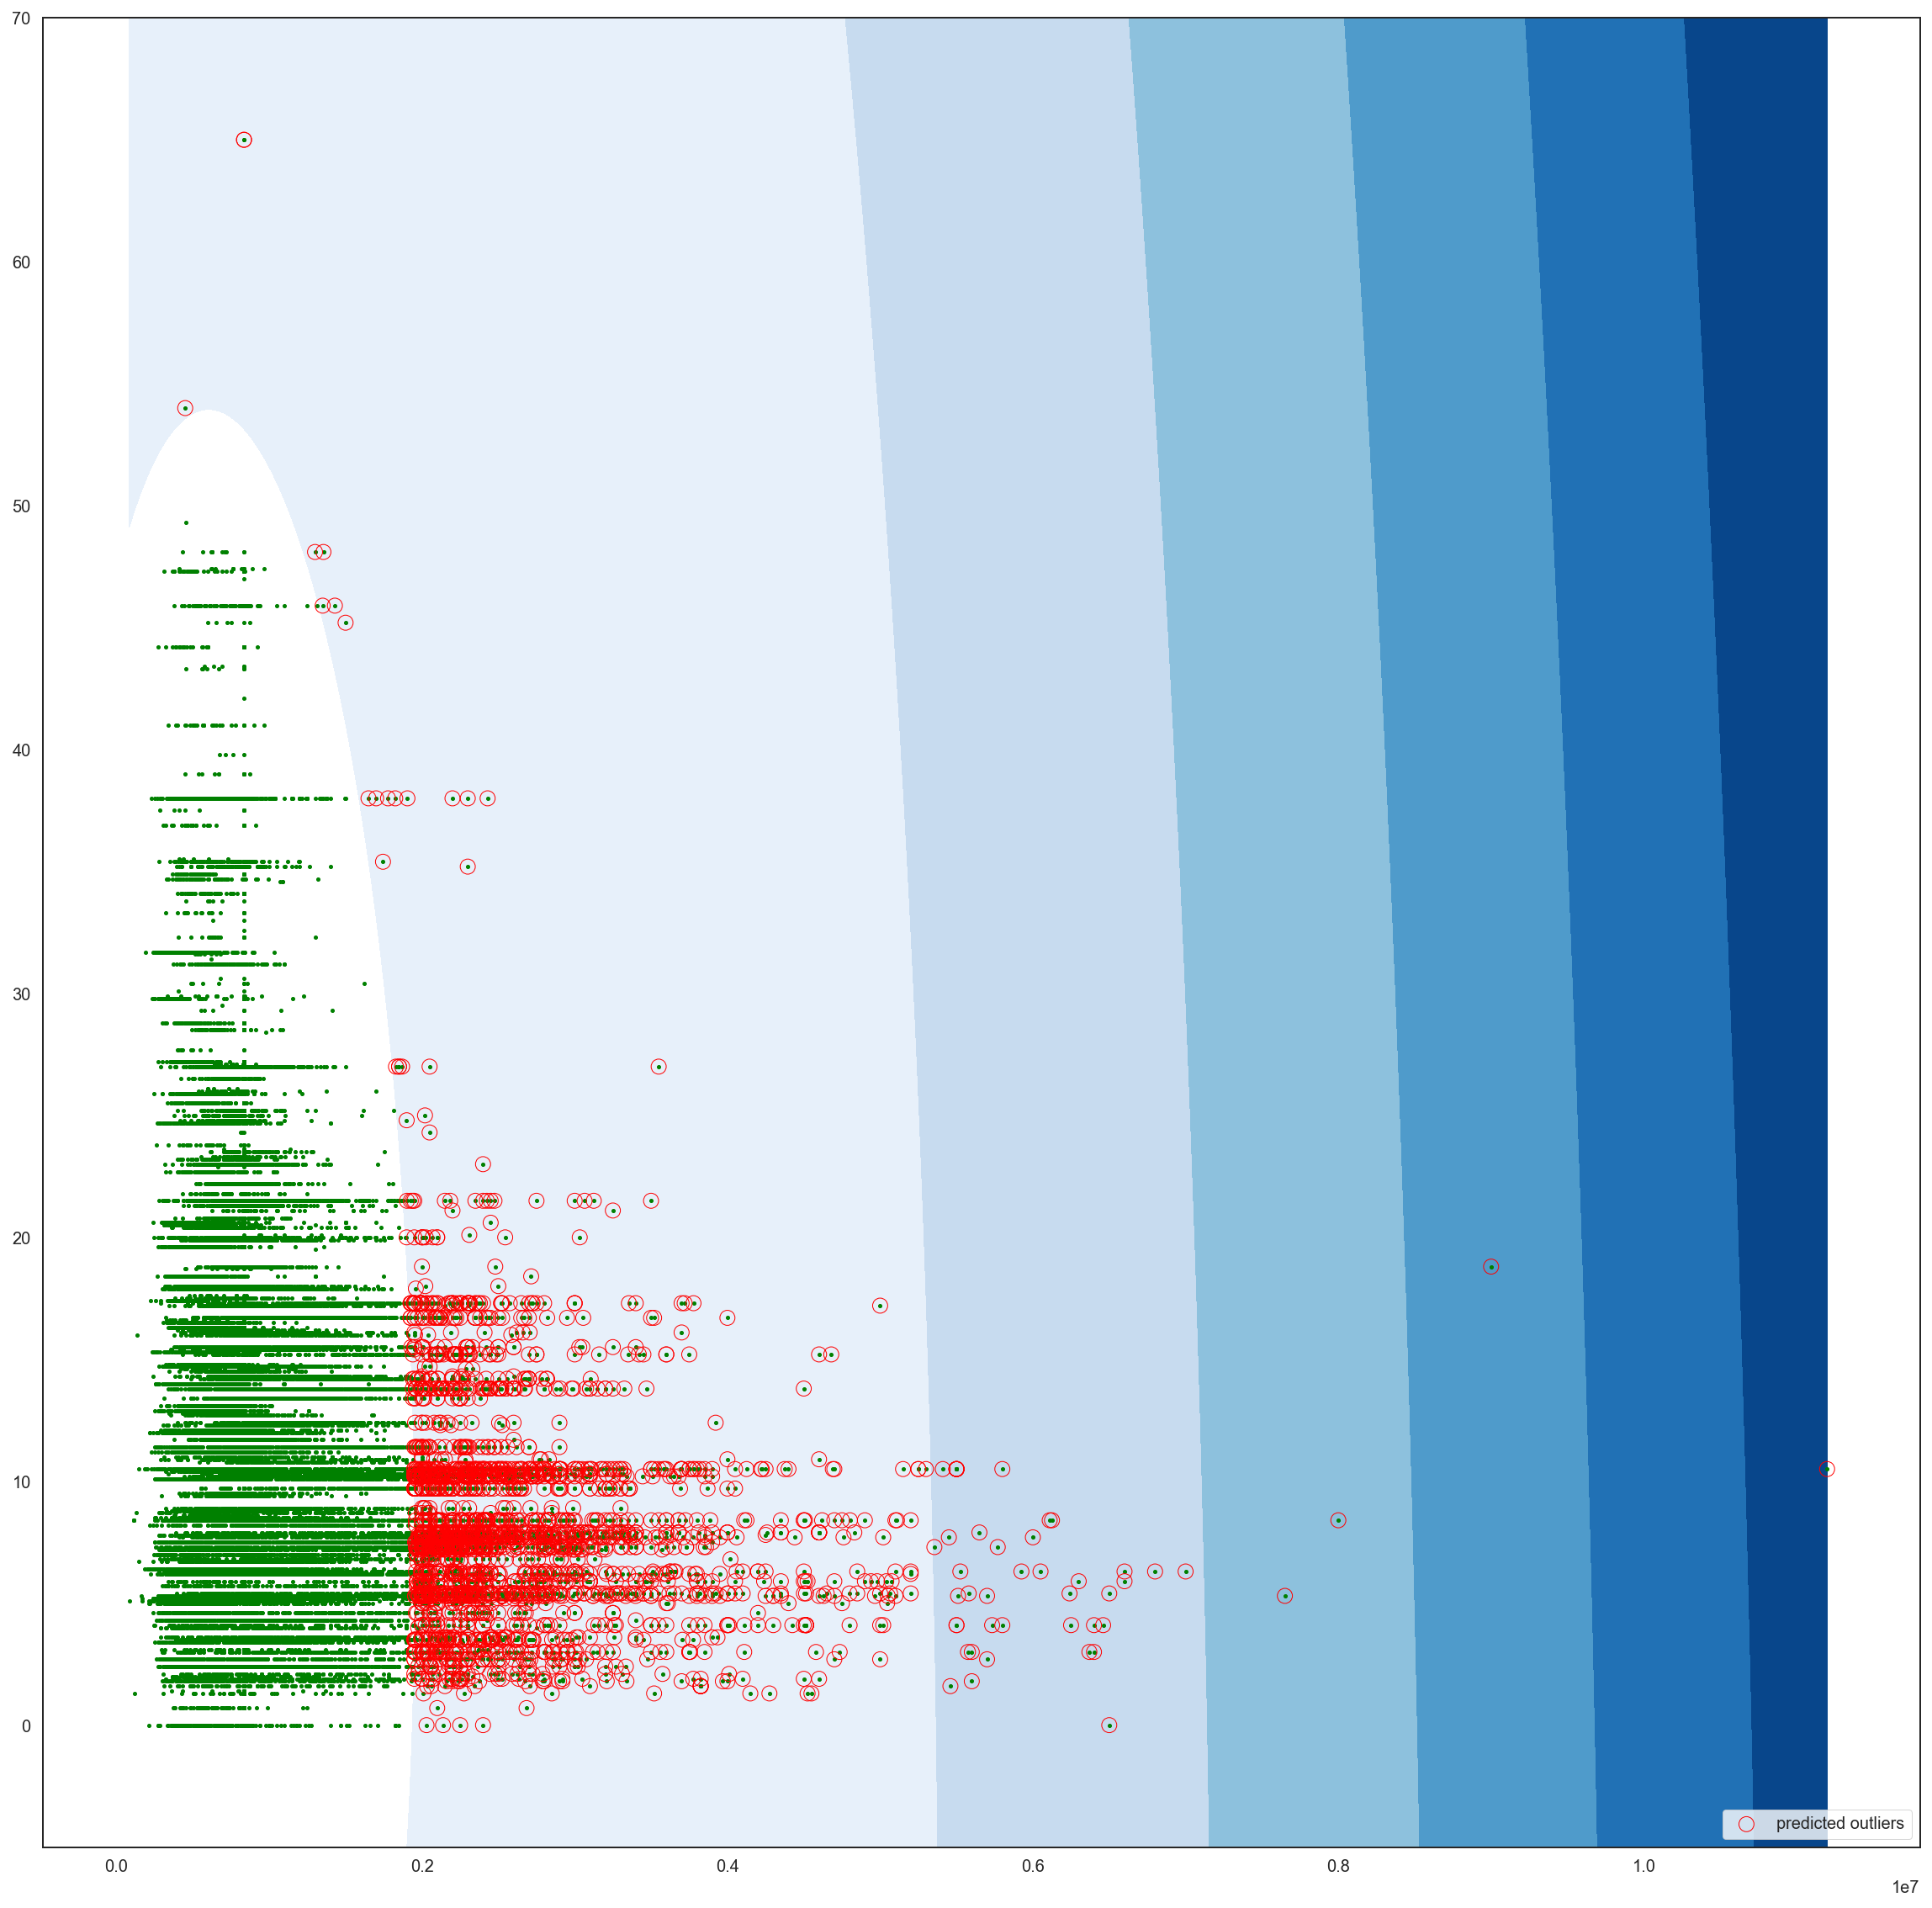

In [11]:
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) # decision_function measure the Mahalanobis distance of each point to the center, read: https://en.wikipedia.org/wiki/Mahalanobis_distance and read: https://scikit-learn.org/stable/modules/generated/sklearn.covariance.EllipticEnvelope.html#sklearn.covariance.EllipticEnvelope.decision_function
Z = Z.reshape(xx.shape)

# Binary prediction of normal vs. outlier
pred = clf.predict(data1[['Price','Distance']])
sum(pred == -1)  # Outlier points are predicted as -1

fig, ax = plt.subplots(figsize=(20,20))
ax.contourf(xx, yy, Z, cmap=plt.cm.Blues_r, levels=np.linspace(Z.min(), threshold, 7))
ax.scatter(X1, X2, s=4, color="g")

# Pot circles around the predicted outliers
ax.scatter(data1[['Price']][pred == -1], data1[['Distance']][pred == -1],  
           facecolors="none", edgecolors="red", s=80, label="predicted outliers")
ax.legend(loc="lower right")

In [12]:
data1[['Price']][pred == -1]

,Price
13,2008000.0
18,2110000.0
33,2700000.0
34,2035000.0
39,2600000.0
...,...
52717,2525000.0
52752,2400000.0
52887,1965000.0
52892,4515000.0


## Univariate Nonparametric methods
We make no prior assumption about the distribution.

One efficient way of performing outlier detection in high-dimensional datasets is to use **random forests**. The ensemble.IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.

This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.
Read more here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html#sklearn.ensemble.IsolationForest

In [13]:
from sklearn.ensemble import IsolationForest

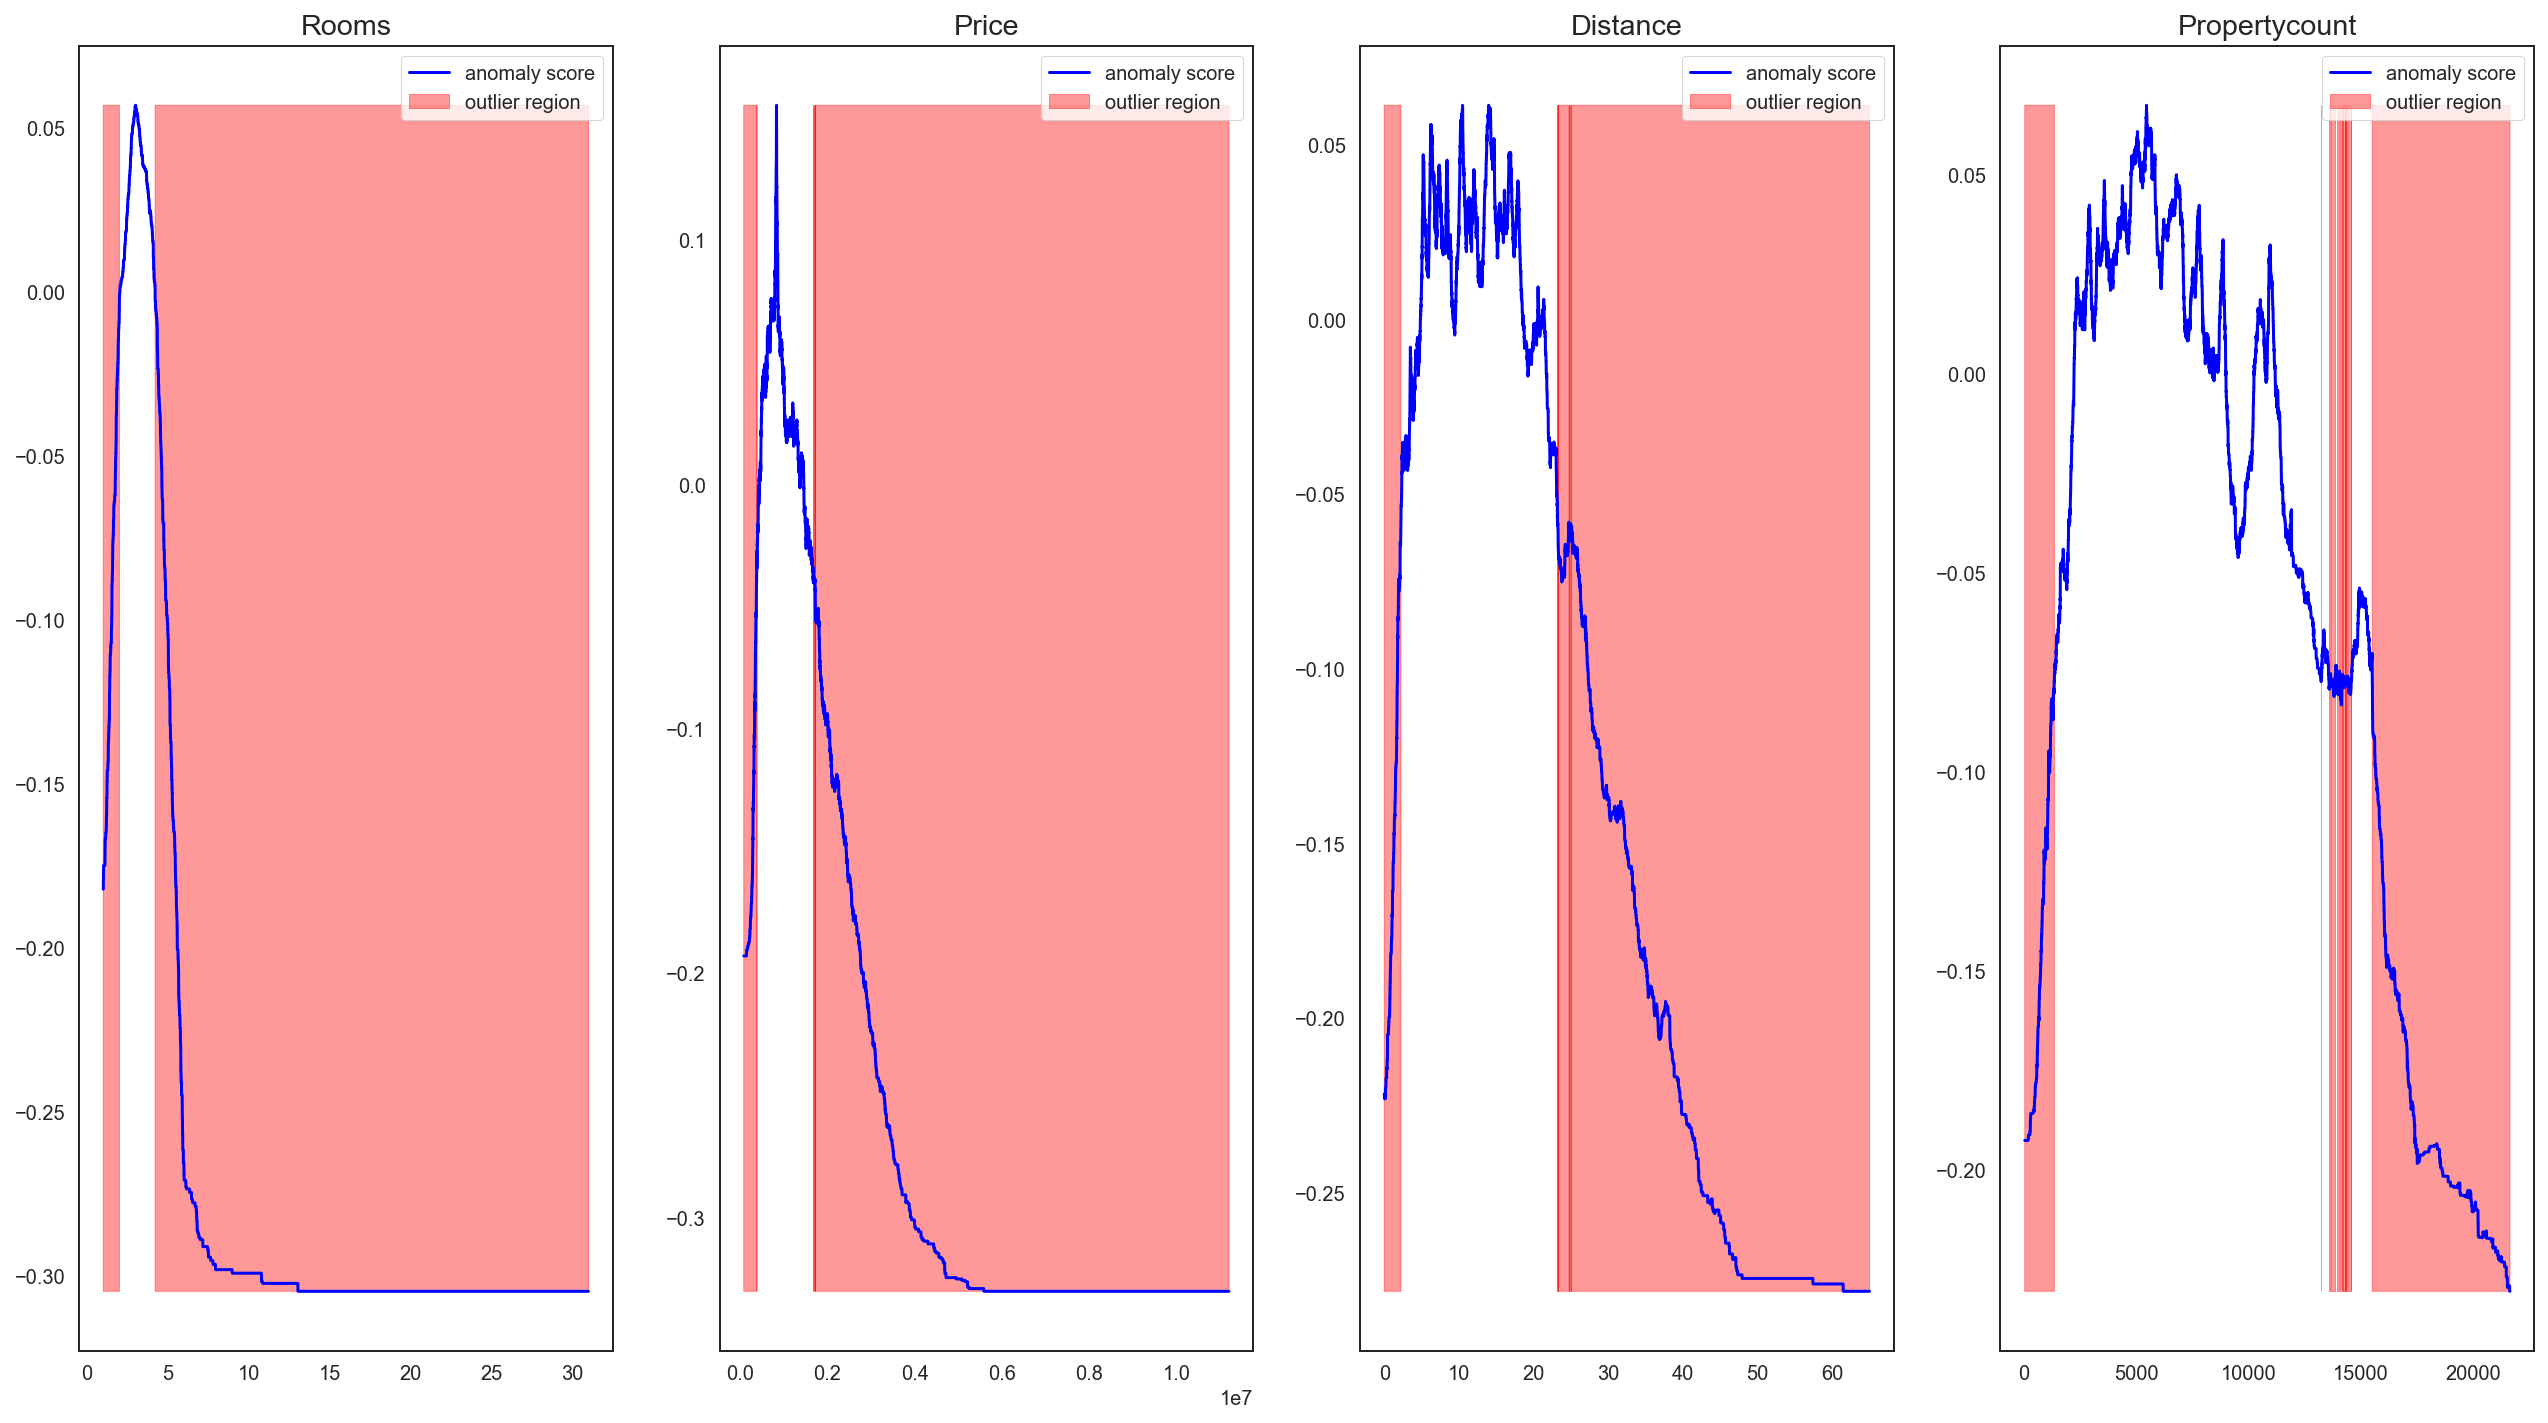

In [14]:
cols = ['Rooms', 'Price', 'Distance', 'Propertycount']
data1 = data_raw.copy(deep=True)
data1.fillna(data1.median(), inplace=True)

fig, axs = plt.subplots(1, 4, figsize=(22, 12), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i, column in enumerate(cols):
    isolation_forest = IsolationForest()
    isolation_forest.fit(data1[column].values.reshape(-1,1))

    xx = np.linspace(data1[column].min(), data1[column].max(), len(data1)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx) #metric: path lenght random tree for isolation
    outlier = isolation_forest.predict(xx)
    
    axs[i].plot(xx, anomaly_score, label='anomaly score', color='b')
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
    axs[i].legend()
    axs[i].set_title(column)

## Multivariate Nonparametric methods


### DBSCAN
This alogithm has a measure based on the density to detect outliers. It finds core samples of high density and expands clusters from them. It works based on Euclidean distance, so we must scale data before applying the algorithm.

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

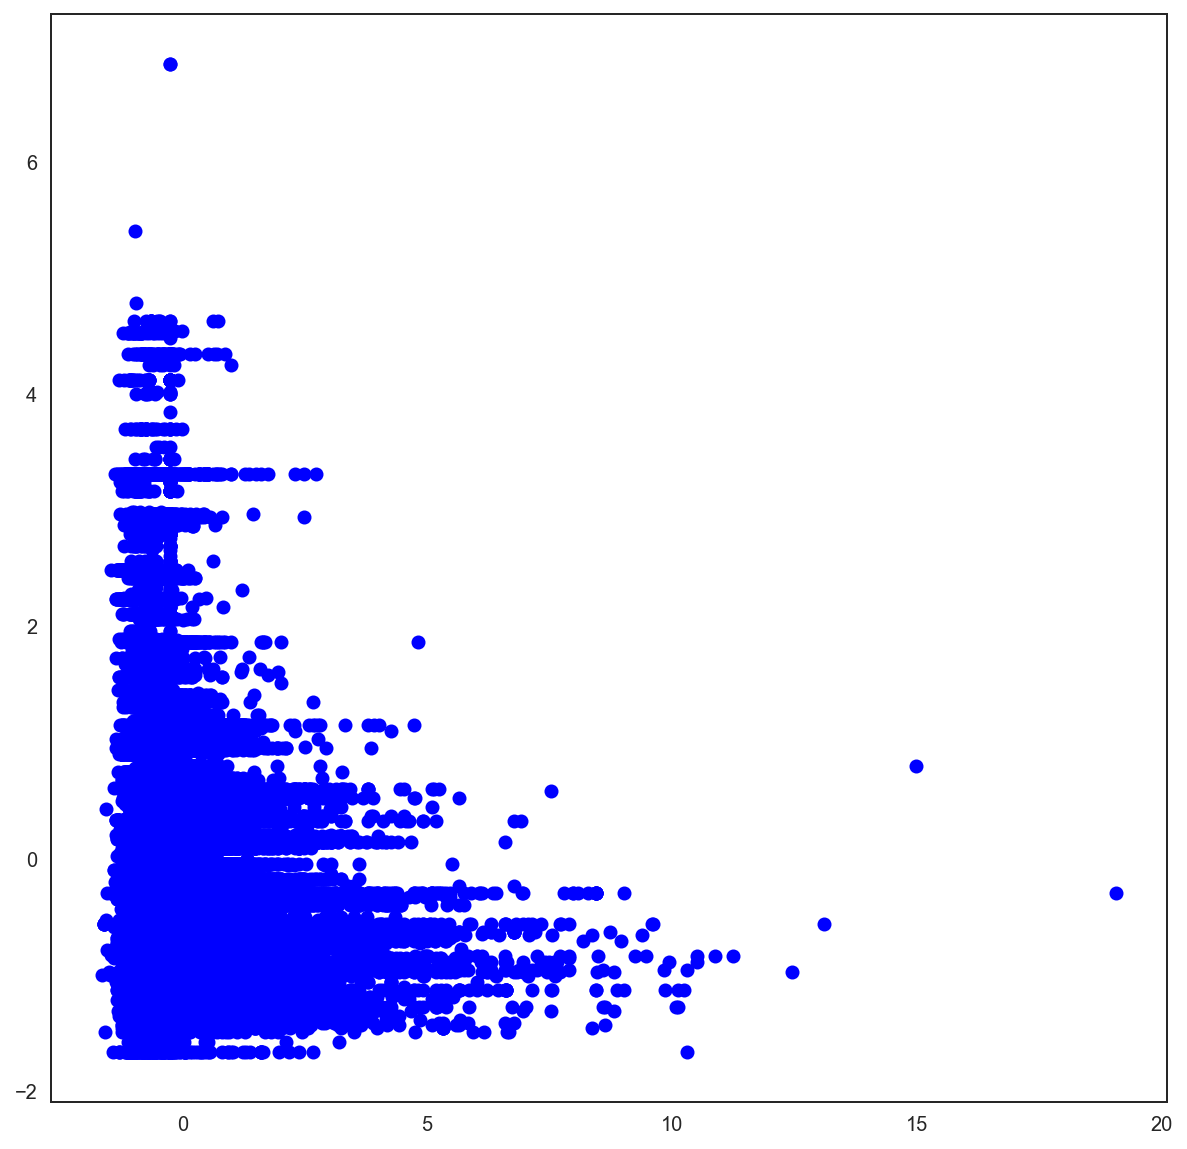

In [16]:
transformer = StandardScaler()
X = transformer.fit_transform(data1[['Price','Distance']])
plt.figure(figsize=(10,10))
plt.plot(X[:,0], X[:, 1], 'o', color='b')


In [17]:
db = DBSCAN(eps=1, min_samples=10).fit(X)
labels = db.labels_

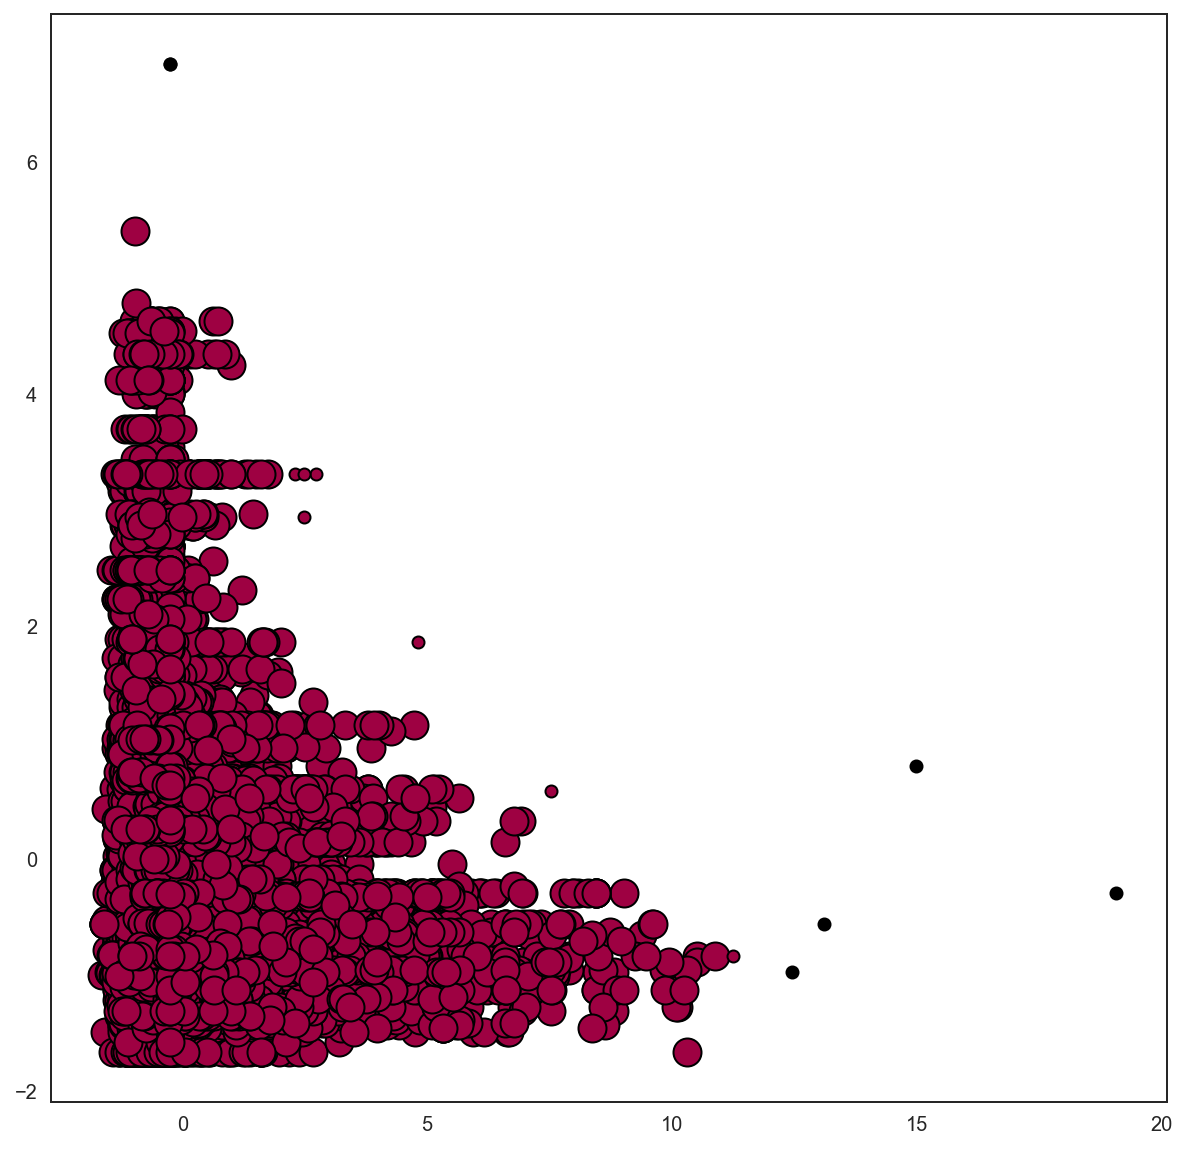

In [18]:
plt.figure(figsize=(10,10))
unique_labels = set(labels)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.show()

In [19]:
X[labels==-1] #outlier have label -1, otherwise the label is the cluster number

array([[-0.24203159,  6.85273486],
       [13.1090627 , -0.56405254],
       [12.45688085, -0.97027235],
       [-0.24203159,  6.85273486],
       [19.07186825, -0.28887139],
       [14.97243944,  0.79874938]])

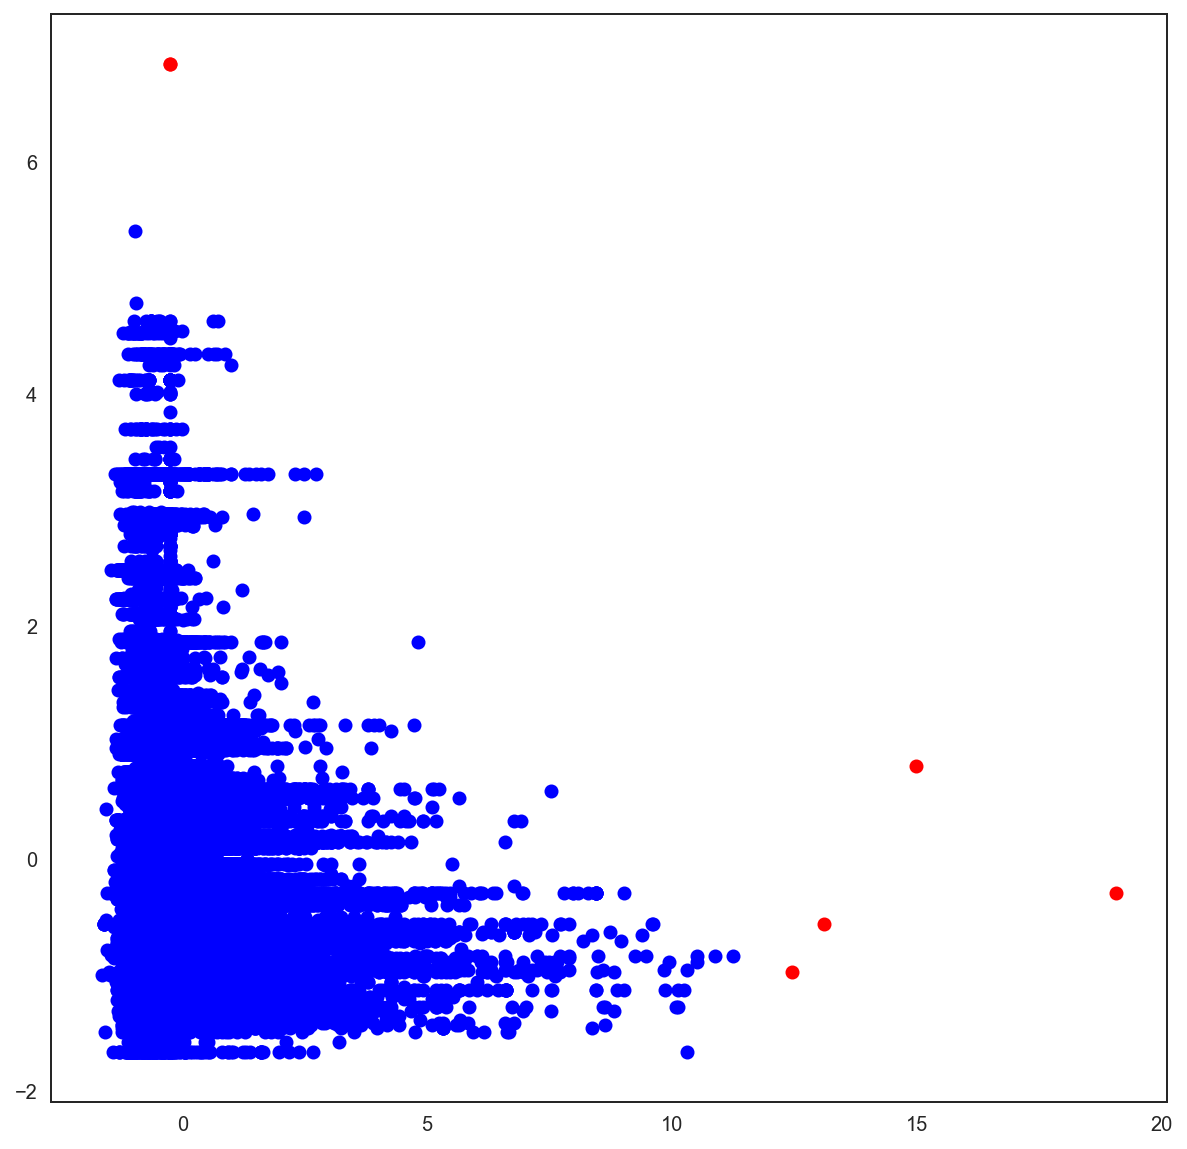

In [20]:
plt.figure(figsize=(10,10))

unique_labels = set(labels)
colors = ['blue', 'red']

for color,label in zip(colors, unique_labels):
    sample_mask = [True if l == label else False for l in labels]
    plt.plot(X[:,0][sample_mask], X[:, 1][sample_mask], 'o', color=color)

### LOF (local outlier factor)
Same as DBSCAN, it is a local density based approach to find outliers.

It measures the local density deviation of a given data point with respect to its neighbors. The idea is to detect the samples that have a substantially lower density than their neighbors. In practice the local density is obtained from the k-nearest neighbors.

The LOF score of an observation is equal to the ratio of the average local density of his k-nearest neighbors, and its own local density: a normal instance is expected to have a local density similar to that of its neighbors, while abnormal data are expected to have much smaller local density.

The local density is calculated based on reachability distance (maximum distance of k-neighbours) of the point. Read here for more details: https://en.wikipedia.org/wiki/Local_outlier_factor

In [21]:
from sklearn.neighbors import LocalOutlierFactor
# X = [[-1.1], [0.2], [101.1], [0.3]]
clf = LocalOutlierFactor(n_neighbors=150)
res = clf.fit_predict(X)
mask = [False if x== 1 else True for x in res]
X[mask]
# outlier_detector.negative_outlier_factor_ # Inliers tend to have a LOF score close to 1 (negative_outlier_factor_ close to -1), while outliers tend to have a larger LOF score.

array([[-0.19544717, -0.22335206],
       [-0.24016821, -0.8392337 ],
       [-0.24203159,  0.49736049],
       ...,
       [-1.15005507,  3.3146914 ],
       [-0.29234276, -0.56405254],
       [-0.24203159,  0.64150301]])

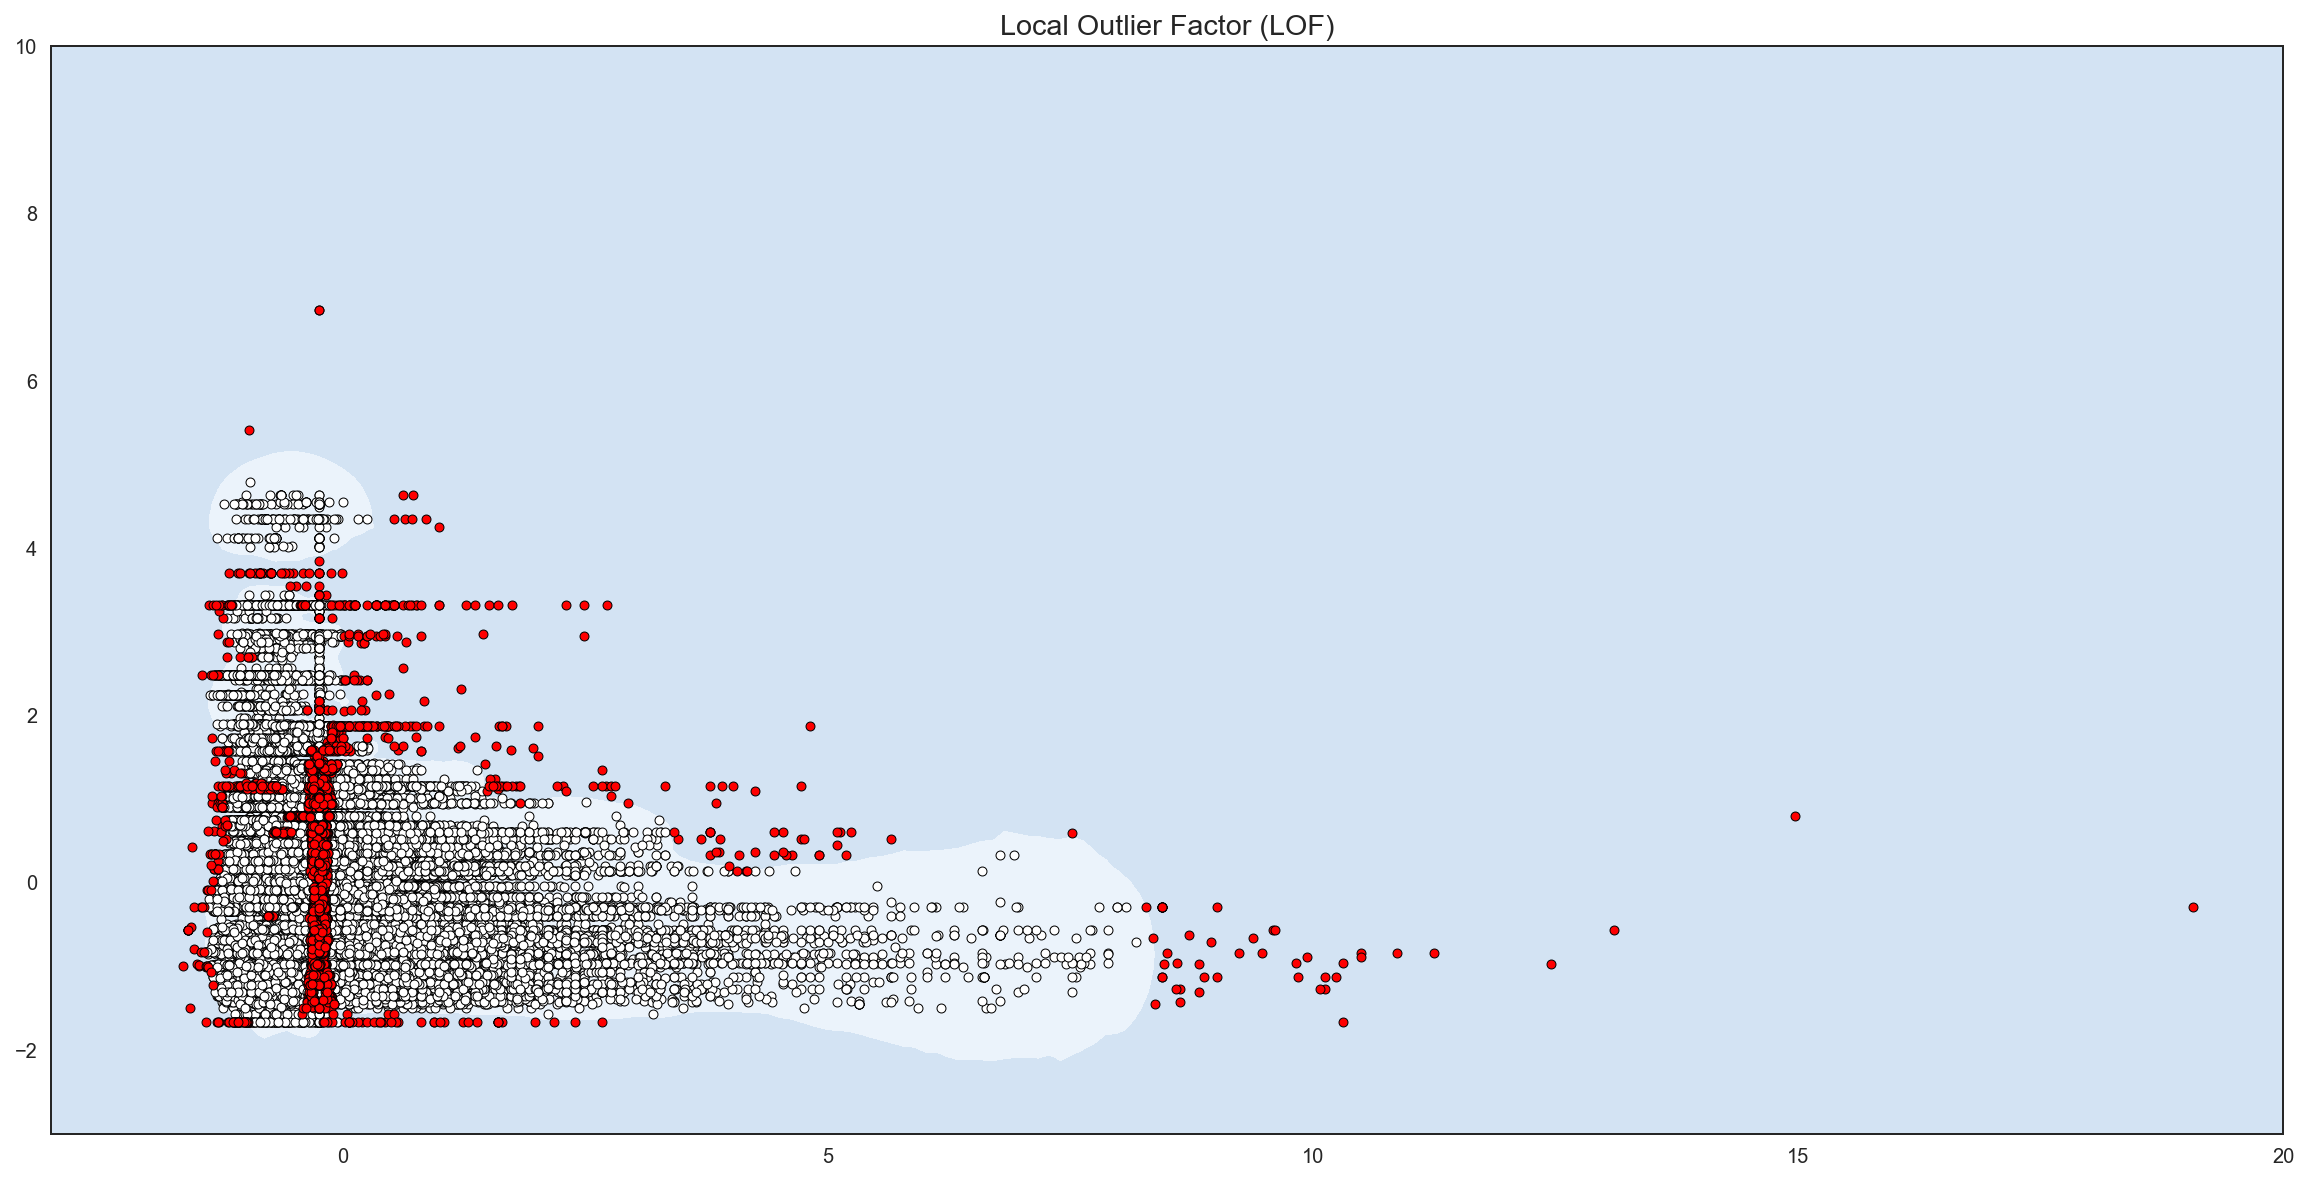

In [22]:
plt.figure(figsize=(20,10))
# plot the level sets of the decision function
xx, yy = np.meshgrid(np.linspace(-3, 20, num=200), np.linspace(-3, 10, num=200))
Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

in_mask = [True if l == 1 else False for l in res]
out_mask = [True if l == -1 else False for l in res]

plt.title("Local Outlier Factor (LOF)")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
# inliers
a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c='white',
                edgecolor='k', s=20)
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c='red',
                edgecolor='k', s=20)
plt.axis('tight')
# plt.ylim(-2,2)
# plt.xlim(-0.5,0)
plt.show()


In [23]:
transformer.inverse_transform(pd.DataFrame([[-0.3,-1.5],[-0.1,1.5]]))

array([[8.03890666e+05, 1.25747007e+00],
       [9.11222692e+05, 2.41514794e+01]])

Combining multiple outlier detection algorithms using ensemble is a good approach to improve quality of detection